# Hyperboloidal Teukolsky Tutorial

First we load in the python package, namely the classes RadialTeukolsky and HyperboloidalTeukolsky

In [1]:
from hblteuk import RadialTeukolsky, HyperboloidalTeukolsky
import time
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import numpy as np

## RadialTeukolsky class

To generate Teukolsky solutions we first create an instance of the RadialTeukolsky class by specifying a spin-weight $s$, spheroidal multipole mode number $l$, and frequency $\omega$. Note that at the moment we have only implemented this for Schwarzschild spacetime ($a/M = 0$), and therefore the value of azimuthal mode number $m$ is irrelevant.

In [2]:
s = -2
l = 16
omega = 0.5
teuk = RadialTeukolsky(s, l, omega)
display(teuk)

Next we generate the homogeneous solutions by calling the `solve()` method

In [3]:
%timeit teuk.solve()

18.1 ms ± 392 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


By default the class constructs both the 'In' and 'Up' solutions (e.g., $R_{sl\omega}^\mathrm{in}(r)$ and $R_{sl\omega}^\mathrm{up}(r)$), though we can ask the solver to just construct one of the homogeneous solutions via the option `bc` argument. For example,

In [4]:
%timeit teuk.solve(bc='In')

9.05 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Likewise, the default `teuk.solve()` call is equivalent to

In [5]:
%timeit teuk.solve(bc=['In', 'Up'])

18.2 ms ± 389 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Once we have solved the Teukolsky equation, we can directly call the class to access either the 'In' or 'Up' solution. If we call `teuk()` with no arguments, then it will return a dict with keys 'In' and 'Up' that correspond to the solutions $R_{sl\omega}^\mathrm{in}(r)$ and $R_{sl\omega}^\mathrm{up}(r)$. Otherwise, we can specify one of the solutions in the argument call to get a specific solution. For example,

In [6]:
display(teuk())
Rteuk = teuk()
Rin = Rteuk['In']
Rup = Rteuk['Up']
Rin_copy = teuk('In')
Rup_copy = teuk('Up')
display(Rin, Rin_copy)
display(Rup, Rup_copy)

{'In': <hblteuk.RadialTeukolskySolution at 0x7fc3900be7f0>,
 'Up': <hblteuk.RadialTeukolskySolution at 0x7fc3900c4370>}

Note that the display output also tells us the radial domain on which each solution is constructed. Therefore, we see that the 'In' solution is only known for $2 \leq r/M \leq 105.83$. Alternatively we can access the `domain` attribute to find the relevant domain of validity. (We can change this range of validity using the optional arguments of `solve()`. See following section for more details.)

In [7]:
print(Rin.domain) 
print(Rup.domain)
print(teuk.domain)

[2.0, 105.82673679787996]
[4.0, inf]
{'In': [0.018898815748423097, 1.0], 'Up': [4.0, inf]}


Calling a solution with a value or numpy array of values will return the corresponding solution value(s).

In [8]:
print(Rin(10.))
print(Rin(np.array([10., 11.])))

(-8.526181995708729e+18-7.943618120034888e+17j)
[-8.52618200e+18-7.94361812e+17j -5.12931237e+19-7.95785717e+18j]


Alternatively, one can use the class method `sol(r)`

In [9]:
print(Rup.sol(10.))
print(Rup.sol(np.array([10., 11.])))

(1201939706.5449443-5220880855.100521j)
[1.20193971e+09-5.22088086e+09j 1.96126336e+08-1.21527914e+09j]


To generate the solution at linearly-spaced points across the domain of validity, one can simply call the method `linspace(cutoff, n=100)`, with the optional argument `n` indicating the number of sample points. The default setting produces 100 points. The `cutoff` value specifies the minimum value of `r` for the `Up` solutions and the maximum value of `r` for the `In` solutions. This cutoff is necessary because the Teukolsky solutions formally diverge at the horizon and infinity. This method returns an array of radial points and array of solutions. Alteratively, if we just want to produce an array of radial points without generating the solution, we can call `linspace_var(cutoff, n=100)` instead.

In [10]:
print(Rin.linspace(2.01)[0].shape)
print(Rin.linspace(2.01, 10))
print(Rin.linspace_var(2.01, 10))

(100,)
[array([  2.01      ,  13.54519298,  25.08038596,  36.61557893,
        48.15077191,  59.68596489,  71.22115787,  82.75635084,
        94.29154382, 105.8267368 ]), array([-1.17774848e-04-5.31926731e-04j, -2.20119998e+21-7.13250930e+20j,
       -1.56692782e+25-3.45817035e+25j,  9.71070990e+26-6.30741812e+26j,
       -2.66962263e+27-3.03670887e+26j, -1.12094151e+27+5.20840845e+27j,
        7.34474400e+27+5.63923120e+27j,  1.43017770e+28-3.80409564e+27j,
        1.09089967e+28-1.91929696e+28j, -6.30549835e+27-3.07392703e+28j])]
[  2.01        13.54519298  25.08038596  36.61557893  48.15077191
  59.68596489  71.22115787  82.75635084  94.29154382 105.8267368 ]


We can also get the derivative $\partial_r R_{sl\omega}(r)$ via the class method `deriv(r)` 

In [11]:
print(Rup.deriv(10.))
print(Rup.deriv(np.array([10., 11.])))

(-2220653326.31394+8077811711.609354j)
[-2.22065333e+09+8.07781171e+09j -3.52908848e+08+1.66998857e+09j]


Alternatively, one can call the class itself and specify the optional argument `deriv`

In [12]:
Rup(10., deriv=1)

(-2220653326.31394+8077811711.609354j)

At the moment only the first two derivatives are available. Higher derivatives will be soon implemented in the future.

### `RadialTeukolsky.solve()` method
The `solve()` method posses the following optional arguments:

`RadialTeukolsky.solve(bc=['In','Up'], use_ts_transform=True, cutoff=[2,np.inf], subdomains=0, chebyshev_samples=16)`

The option `use_ts_transform` specifies whether or not we make use of the Teukolsky-Starobinsky identities to generate stable numerical solutions depending on the sign of the spin-weight $s$. By setting this option to `False`, certain solutions will be numerically unstable, leading to inaccurate solutions, though this is not always the case.

In [19]:
teuk.solve(use_ts_transform=False)
Rup_ts = teuk('Up')

<ipython-input-46-637e5c4fb1bd>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.real(r1), np.log10(np.abs(1-R1/R2)))


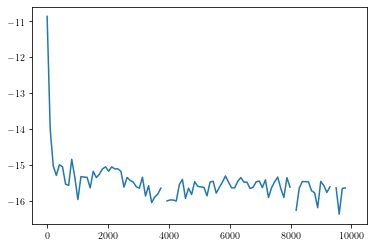

In [46]:
r1, R1 = Rup_ts.linspace(10**4)
r2, R2 = Rup.linspace(10**4)
plt.plot(np.real(r1), np.log10(np.abs(1-R1/R2)))
plt.show()

We can see in this instance that we do not accrue much of an error when we avoid Teukolsky-Starobinsky

The option `cutoff=[rmin, rmax]` sets the minimum radius `rmin` for which we calculate $R^\mathrm{up}$ and the maximum radius `rmax` for which we calculate $R^\mathrm{in}$. One can also specify `cutoff=r0` so that `rmin=rmax=r0`. If one leaves `cutoff` set at the default values, then the code chooses the cutoff values based on the frequency $\omega$.

In [47]:
teuk.solve(cutoff=[4., 1000.])
Rin_200 = teuk('In')

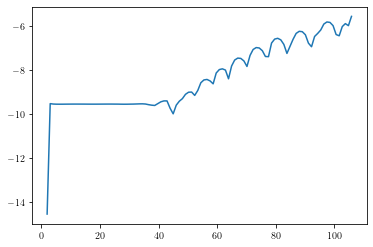

In [48]:
r1, R1 = Rin.linspace(2.01)
R2 = Rin_200(r1)
plt.plot(np.real(r1), np.log10(np.abs(1-R1/R2)))
plt.show()

We see that extending the domain leads to less accurate solutions, namely because we are using the same number of Chebyshev series to represent a much larger computational domain. Thus, we expect the solutions to be less accurately represented across the larger domain.

The option `subdomains=N` specifies the number of subdomains that are used to construct the solution. Therefore, `N` subdomains means we tile $r$ into `N` sub-regions with each region represented by a different Chebyshev series. If `subdomains` is set to 0, then the code internally sets `N = max[16, 4*l]`. Increasing the number of subdomains typically increases computational time.

In [49]:
teuk.solve(subdomains=70)
Rin_70 = teuk('In')
teuk.solve(subdomains=100)
Rin_100 = teuk('In')

<ipython-input-50-3639ec4cdfda>:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.real(r1), np.log10(np.abs(1-R1/R2)))
<ipython-input-50-3639ec4cdfda>:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.real(r1), np.log10(np.abs(1-R2/R3)))


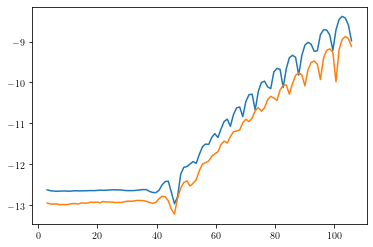

In [50]:
r1, R1 = Rin.linspace(2.01)
R2 = Rin_70(r1)
R3 = Rin_100(r1)
plt.plot(np.real(r1), np.log10(np.abs(1-R1/R2)))
plt.plot(np.real(r1), np.log10(np.abs(1-R2/R3)))
plt.show()

Thus we see the improvement we get in the accuracy of our solutions as we split the domain into more sub-regions and use additional Chebyshev series to represent the full solution.

The option `chebyshev_samples` specifies the number of terms that are used in each of the Chebysehv series that represent the homogeneous solutions. Increasing the number of Chebyshev terms will increase computational time, but may also increase accuracy.

In [51]:
teuk.solve(chebyshev_samples=32)
Rin_32 = teuk('In')
teuk.solve(chebyshev_samples=64)
Rin_64 = teuk('In')

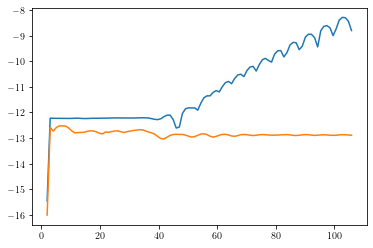

In [52]:
r1, R1 = Rin.linspace(2.01)
R2 = Rin_32(r1)
R3 = Rin_64(r1)
plt.plot(np.real(r1), np.log10(np.abs(1-R1/R2)))
plt.plot(np.real(r1), np.log10(np.abs(1-R2/R3)))
plt.show()

## HyperboloidalTeukolsky class
This class is quite similar to RadialTeukolsky and shares almost all of the same functions, but rather than producing $R_{sl\omega}^\mathrm{in}(r)$ and $R_{sl\omega}^\mathrm{up}(r)$, it outputs $\psi_{sl\omega}^\mathrm{in}(\sigma)$ and $\psi_{sl\omega}^\mathrm{up}(\sigma)$ for $\sigma = 2M/r$ and $R_{sl\omega}^\mathrm{in/up}(\sigma) = Z_{sl\omega}(\sigma)\psi_{sl\omega}^\mathrm{in/up}(\sigma)$.teuk =

In [88]:
hbl = HyperboloidalTeukolsky(s, l, omega)
display(hbl)

In [89]:
%timeit hbl.solve()

18.7 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [90]:
display(hbl())
Psihbl = hbl()
Psiin = Psihbl['In']
Psiup = Psihbl['Up']
Psiin_copy = hbl('In')
Psiup_copy = hbl('Up')
display(Psiin, Psiin_copy)
display(Psiup, Psiup_copy)

{'In': <hblteuk.HyperboloidalTeukolskySolution at 0x7fc3902bf5b0>,
 'Up': <hblteuk.HyperboloidalTeukolskySolution at 0x7fc3902bd460>}

We can also generate the hyperboloidal solutions from the RadialTeukolsky class and Teukolsky solutions from the HyperboloidalTeukolsky class via

In [91]:
teuk.solve()
Psihbl_copy = teuk.get_hyperboloidal()
Rteuk_copy = hbl.get_teukolsky()
display(Psihbl_copy['In'])
display(Rteuk_copy['In'])

One small difference is that the hyperboloidal solutions are regular at least one of the boundaries. Therefore, when we call linspace, we do not need to specify cutoff values

In [92]:
print(Psiin.linspace()[0].shape)
print(Psiin.linspace(10))
print(Psiin.linspace_var(10))

(100,)
[array([0.01889882, 0.12791006, 0.2369213 , 0.34593254, 0.45494379,
       0.56395503, 0.67296627, 0.78197751, 0.89098876, 1.        ]), array([-1.44885272e+22-2.33809922e+22j,  9.58205664e+18-1.32476411e+18j,
       -8.47634358e+14-3.11003819e+14j,  2.68585872e+11-1.44636178e+12j,
        7.11945122e+09-5.68063901e+09j,  1.08290110e+08-3.23534306e+07j,
        1.95973192e+06-2.40516997e+05j,  3.64535946e+04-5.48210322e+03j,
        4.58642493e+02-2.29761175e+02j, -8.32293673e-01-1.81859485e+00j])]
[0.01889882 0.12791006 0.2369213  0.34593254 0.45494379 0.56395503
 0.67296627 0.78197751 0.89098876 1.        ]


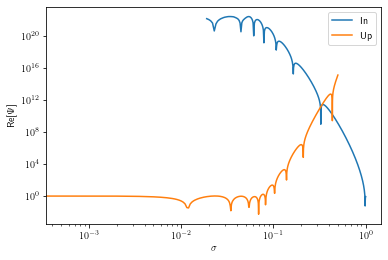

In [95]:
plt.loglog(*np.abs(np.real(Psihbl['In'].linspace(1000))), label='In')
plt.loglog(*np.abs(np.real(Psihbl['Up'].linspace(1000))), label='Up')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'Re[$\Psi$]')
plt.legend()
plt.show()